<a href="https://colab.research.google.com/github/Engineer-Gustavo-Softworks/TRABALHANDO-COM-DADOS-05/blob/main/Previs%C3%A3o_Aluguel_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Temos mais um dataset com informações de imóveis, pode parecer repetitivo, mas é um dataset ideal para treinarmos várias técnicas relacionadas ao processo de criação de ciência através dos dados.

O dataset "houses to rent" mostra informações a respeito de imóveis em algumas cidades no brasil. Vamos supor que trabalhamos numa startup que filtra e indica os alugueis dos imóveis cadastrados. Portanto,nosso objetivo sempre será prever o valor do aluguel do imóvel (ou talvez do IPTU, Condominimo etc no futuro).

Esse será o dataset que utilizaremos como nosso primeiro projeto de data science, vou chamar esse notebook de BASELINE.

##Importe as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

##Leia o conjunto de dados

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/amandaacacio/DatasetsML/main/houses_to_rent_v2.csv', sep=';')

##Faça EDA básico, para os primeiros entendimentos do dataset

In [3]:
df.head()

,cidade,area,quartos,banheiros,vagas_garagem,andar,animal,mobiliado,valor_condominio,valor_aluguel,iptu,seguro_incendio,valor_total
0,São Paulo,70,2.0,1.0,1,7,acept,furnished,2065.0,3300,211,42,5618
1,São Paulo,320,4.0,4.0,0,20,NaN,not furnished,1200.0,4960,1750,63,7973
2,Porto Alegre,80,1.0,NaN,1,6,acept,not furnished,NaN,2800,0,41,3841
3,Porto Alegre,51,2.0,1.0,0,2,acept,not furnished,270.0,1112,22,17,1421
4,São Paulo,25,1.0,1.0,0,1,not acept,not furnished,NaN,800,25,11,836


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cidade            10692 non-null  object 
 1   area              10692 non-null  int64  
 2   quartos           10687 non-null  float64
 3   banheiros         10689 non-null  float64
 4   vagas_garagem     10692 non-null  int64  
 5   andar             10692 non-null  object 
 6   animal            10690 non-null  object 
 7   mobiliado         10692 non-null  object 
 8   valor_condominio  10687 non-null  float64
 9   valor_aluguel     10692 non-null  int64  
 10  iptu              10692 non-null  int64  
 11  seguro_incendio   10692 non-null  int64  
 12  valor_total       10692 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 1.1+ MB


In [5]:
df.describe()

,area,quartos,banheiros,vagas_garagem,valor_condominio,valor_aluguel,iptu,seguro_incendio,valor_total
count,10692.000000,10687.000000,10689.000000,10692.000000,1.068700e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506129,2.236879,1.609147,1.174359e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171410,1.407191,1.589521,1.559594e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.239000e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [6]:
df.describe(include='O')

,cidade,andar,animal,mobiliado
count,10692,10692,10690,10692
unique,5,35,2,2
top,São Paulo,-,acept,not furnished
freq,5887,2461,8314,8086


,area,quartos,banheiros,vagas_garagem,valor_condominio,valor_aluguel,iptu,seguro_incendio,valor_total
area,1.000000,0.193792,0.226758,0.193983,0.006892,0.180742,0.039059,0.188078,0.051799
quartos,0.193792,1.000000,0.733758,0.617515,0.007133,0.541824,0.075257,0.565197,0.134604
banheiros,0.226758,0.733758,1.000000,0.697301,0.050288,0.668568,0.109201,0.676475,0.208335
vagas_garagem,0.193983,0.617515,0.697301,1.000000,0.009352,0.578361,0.098378,0.597348,0.148684
valor_condominio,0.006892,0.007133,0.050288,0.009352,1.000000,0.036500,0.007627,0.029548,0.955034
valor_aluguel,0.180742,0.541824,0.668568,0.578361,0.036500,1.000000,0.107884,0.987343,0.264490
iptu,0.039059,0.075257,0.109201,0.098378,0.007627,0.107884,1.000000,0.105661,0.218344
seguro_incendio,0.188078,0.565197,0.676475,0.597348,0.029548,0.987343,0.105661,1.000000,0.254911
valor_total,0.051799,0.134604,0.208335,0.148684,0.955034,0.264490,0.218344,0.254911,1.000000


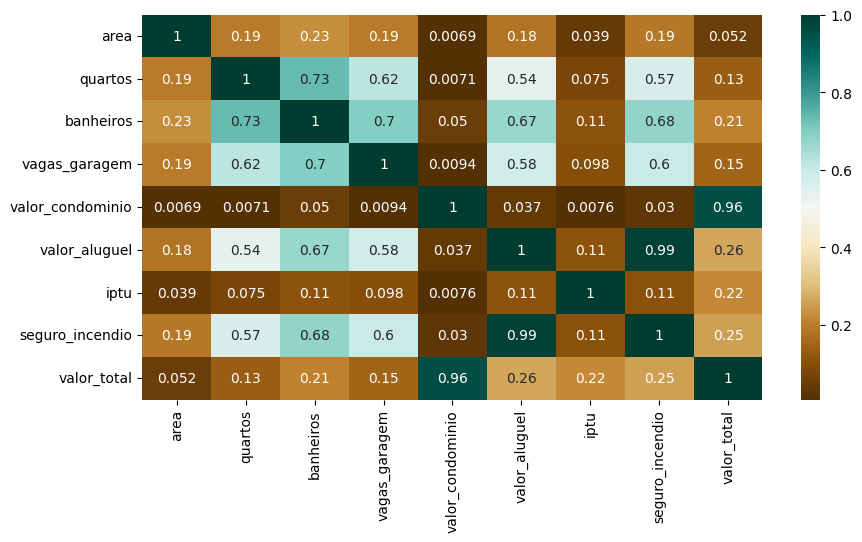

In [7]:
numeric = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,5))
c= numeric.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

##Verifique se existem dados ausentes no dataframe e faça as alterações necessárias

In [9]:
print(df.isnull().sum())

cidade              0
area                0
quartos             5
banheiros           3
vagas_garagem       0
andar               0
animal              2
mobiliado           0
valor_condominio    5
valor_aluguel       0
iptu                0
seguro_incendio     0
valor_total         0
dtype: int64


In [10]:
# Substituir valores ausentes em colunas numéricas com a mediana, mas poderia ser com a média

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_features:
    df[col] = df[col].fillna(df[col].median())

# Substituir valores ausentes em colunas categóricas com a moda

categorical_features = df.select_dtypes(include=['object']).columns

for col in categorical_features:
    df[col] = df[col].fillna(df[col].mode()[0])

In [12]:
print(df.isnull().sum())

cidade              0
area                0
quartos             0
banheiros           0
vagas_garagem       0
andar               0
animal              0
mobiliado           0
valor_condominio    0
valor_aluguel       0
iptu                0
seguro_incendio     0
valor_total         0
dtype: int64


##Verifique se existem valores duplicados no dataframe e faça as alterações necessárias

In [14]:
df.shape

(10692, 13)

In [15]:
# Existencia de valores duplicados
duplicate_rows_df = df[df.duplicated()]
print("linhas duplicadas: ", duplicate_rows_df.shape)

linhas duplicadas:  (358, 13)


In [16]:
# Removendo linhas duplicadas
df = df.drop_duplicates()

In [17]:
df.shape

(10334, 13)

##No variável que queremos prever, existem outliers? Trate-os caso seja necessário

<Axes: xlabel='valor_aluguel'>

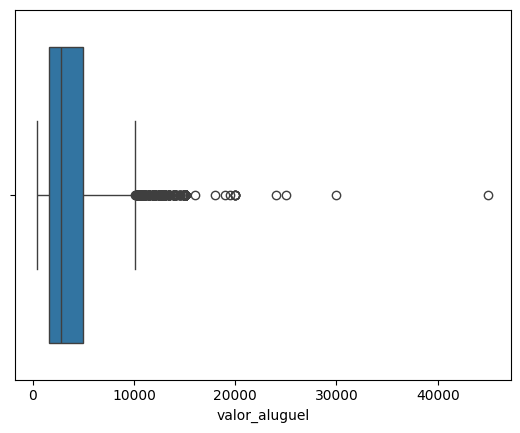

In [18]:
sns.boxplot(x=df['valor_aluguel'])

In [19]:
#Verificando quantos outliers temos no dataframe, para então, decidir se excluiremos
Q1 = df['valor_aluguel'].quantile(0.25)
Q3 = df['valor_aluguel'].quantile(0.75)
IQR = Q3 - Q1

outliers = df['valor_aluguel'][((df['valor_aluguel'] < (Q1 - 1.5 * IQR)) | (df['valor_aluguel'] > (Q3 + 1.5 * IQR)))]
outliers.shape

(723,)

In [21]:
# Removendo os Outilers da amostra
df = df[~df['valor_aluguel'].isin(outliers)]

In [22]:
df.shape

(9611, 13)

<Axes: xlabel='valor_aluguel'>

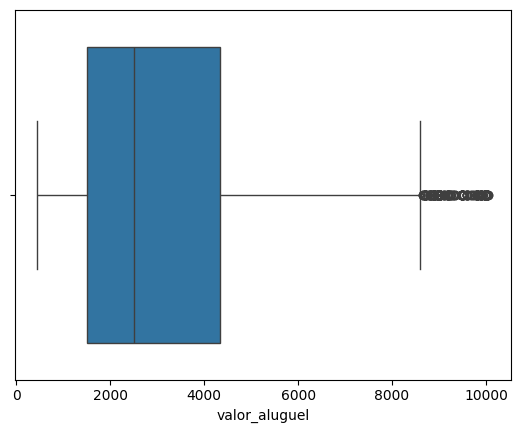

In [41]:
sns.boxplot(x=df['valor_aluguel'])

##Transforme as variáveis categóricas

In [23]:
# Definir colunas numéricas e categóricas novamente
categorical_features = df[df.select_dtypes(include=['object']).columns]
numerical_features = df[df.select_dtypes(include=['int64', 'float64']).columns]

In [24]:
# Inicializando o OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore') # Add handle_unknown to avoid errors with unseen data

# Ajustando e transformando as colunas categóricas
cat_encoded = encoder.fit_transform(categorical_features)

# Ajuste no nome das features
feature_names = encoder.get_feature_names_out(categorical_features.columns)

# Convertendo em DataFrame e criando nomes de colunas
categorias_encoded_df = pd.DataFrame(cat_encoded, columns=feature_names)

# Concatenando com as colunas numéricas
df_final = pd.concat([numerical_features, categorias_encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
df_final.dropna(inplace=True)

In [27]:
print(df_final.isnull().sum())

area                       0
quartos                    0
banheiros                  0
vagas_garagem              0
valor_condominio           0
valor_aluguel              0
iptu                       0
seguro_incendio            0
valor_total                0
cidade_Belo Horizonte      0
cidade_Campinas            0
cidade_Porto Alegre        0
cidade_Rio de Janeiro      0
cidade_São Paulo           0
andar_-                    0
andar_1                    0
andar_10                   0
andar_11                   0
andar_12                   0
andar_13                   0
andar_14                   0
andar_15                   0
andar_16                   0
andar_17                   0
andar_18                   0
andar_19                   0
andar_2                    0
andar_20                   0
andar_21                   0
andar_22                   0
andar_23                   0
andar_24                   0
andar_25                   0
andar_26                   0
andar_27      

In [28]:
# best corr
corr = df_final.corr()['valor_aluguel'].sort_values()
index = corr[corr>0.3].reset_index()['index'].tolist()
index

# select only best corr
df_select = df_final[df_final.columns.intersection(index)]
df_select.columns

Index(['quartos', 'banheiros', 'vagas_garagem', 'valor_aluguel',
       'seguro_incendio'],
      dtype='object')

,quartos,banheiros,vagas_garagem,valor_aluguel,seguro_incendio
quartos,1.000000,0.718021,0.599841,0.534381,0.563759
banheiros,0.718021,1.000000,0.678333,0.656834,0.668414
vagas_garagem,0.599841,0.678333,1.000000,0.558331,0.585359
valor_aluguel,0.534381,0.656834,0.558331,1.000000,0.982876
seguro_incendio,0.563759,0.668414,0.585359,0.982876,1.000000


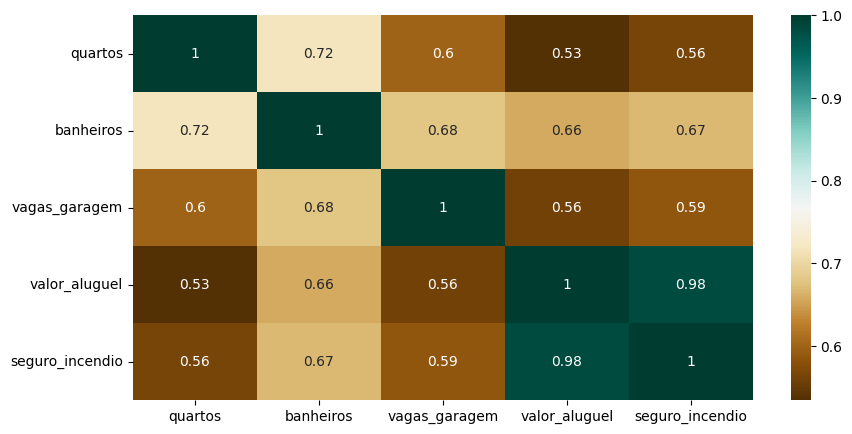

In [32]:
plt.figure(figsize=(10,5))
c= df_select.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

##Normalize os dados

In [33]:
#Definindo o X e o y
y = df_select['valor_aluguel']
df_select.drop(['valor_aluguel'],axis=1,inplace=True)
X = df_select

#Normalizando os dados
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

<ipython-input-33-327ffd7424eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.drop(['valor_aluguel'],axis=1,inplace=True)


In [34]:
df_select.head()

,quartos,banheiros,vagas_garagem,seguro_incendio
0,2.0,1.0,1.0,42.0
1,4.0,4.0,0.0,63.0
2,1.0,2.0,1.0,41.0
3,2.0,1.0,0.0,17.0
4,1.0,1.0,0.0,11.0


##Divida o dataset

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Vamos rodar um algoritmo! Regressão Linear

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

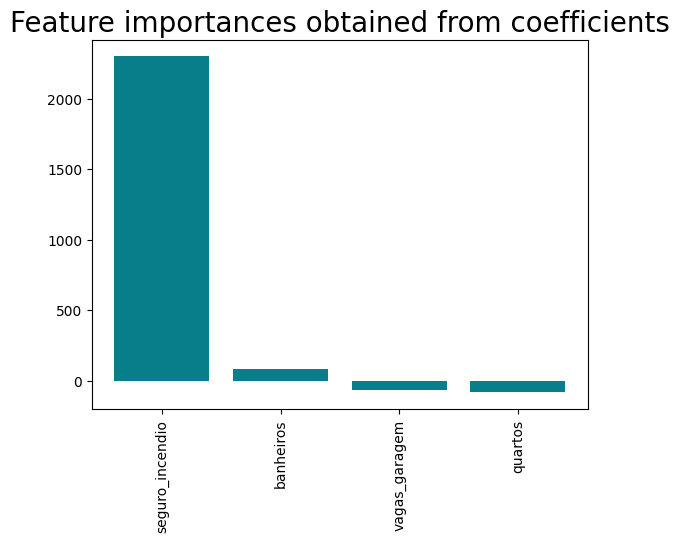

In [37]:
model.fit(X_train, y_train)

importances = pd.DataFrame(data={
    'Attribute': df_select.columns,
    'Importance': model.coef_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [38]:
y_pred = model.predict(X_test)

##Faça as devidas avaliações

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [40]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 203251.8471226786
R-squared: 0.9606581877216334


##Quais observações a respeito da avaliação podemos tirar desse primeiro modelo?


O fato do valor do IPTU explicar tão bem o valor de aluguel, nos sugere, que, o IPTU de um imóvel é calculado baseado nas características do imóvel, e, no seu potencial de valor. Logo, com o valor do IPTU, que é definido pelos órgãos públicos reguladores, podemos "facilmente" prever ou sugerir para nosso cliente o aluguel para aquele imóvel.

##E como seria em produção...

In [44]:
# Função pra Retornar o Valor do Aluguel de um imóvel:

import warnings
warnings.filterwarnings('ignore')

# Função para receber input do usuário e prever o valor do aluguel
def predict_rent():
  input_data = []
  for col in df_select.columns:
    value = float(input(f"Preencha a quantidade ou valor de {col}: "))
    input_data.append(value)

  # Transformando o input em um array NumPy
  input_array = np.array(input_data).reshape(1, -1)

  # Normalizando os dados de input usando o StandardScaler já ajustado / Só ajustamos a normalização, pois, é o único passo que consideramos as 4 features atuais no processo.
  input_scaled = sc.transform(input_array)

  # Fazendo a previsão
  prediction = model.predict(input_scaled)

  print("Valor de Aluguel Sugerido:", prediction[0])

##Previsões

In [48]:
# Chamando a função para testar

predict_rent()

Preencha a quantidade ou valor de quartos: 2
Preencha a quantidade ou valor de banheiros: 2
Preencha a quantidade ou valor de vagas_garagem: 2
Preencha a quantidade ou valor de seguro_incendio: 1000
Valor de Aluguel Sugerido: 71359.00675553145
